<a href="https://colab.research.google.com/github/MWSteams/4590FSP/blob/master/Sedimentation_Mechanical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sedimentation Mechanical

Authors: Justin Conneely, Ian Cullings, Alycia Storch, Brenda Solorzano

See my comment below

[/Monroe/]: # (Well done! Try to find designs for other large scale wtps to see how big the sedimentation tanks are. The MWH textbook might have guidance on constraints for sizes of sed tanks too. If you discover parameters where there is no clear optimum, consider creating a graph that illustrates how the design changes as that parameter changes. For example, you might find that the depth of the sed tank has to increase as the length of the sed tank increases.)
[/Justin/]: # (We will try all these things!)

In [1]:
!pip install aguaclara
!pip install molmass

     |████████████████████████████████| 92kB 2.9MB/s 
     |████████████████████████████████| 163kB 10.8MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.1-cp36-none-any.whl size=99466 sha256=76a1f0bb440b0e61f0700c2feb521582b7be73294769c8421a3d3890a971c259
  Stored in directory: /root/.cache/pip/wheels/7f/ff/4f/10d76e6a261d392aefbdf6ce8d3d5519e924dc334b102ca49b
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=e3c246fd4ebac5868a43603159a4dd5e58a00d52deafd61a2a67aa62d8fab3f6
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint
     |████████████████████████████████| 71kB 2.7MB/s 


In [2]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import molmass as mol
!wget https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
import Fairmont as fmt

--2020-05-06 00:55:59--  https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3025 (3.0K) [text/plain]
Saving to: ‘Fairmont.py’

Fairmont.py         100%[===================>]   2.95K  --.-KB/s    in 0s      

2020-05-06 00:55:59 (60.8 MB/s) - ‘Fairmont.py’ saved [3025/3025]



# Task Definition

The task for our group is broadly to conduct research and analysis on different mechanical sedimentation and sludge removal systems in order to determine the optimal design for the Fairmont Sedimentation Plant. More specifically, this task can be broken down into smaller components: 


1.   to analyse the constraints that bind the sedimentation-sludge removal system
2.   to determine the underlying physical principals that guide these constraints, 
3.   to assess different alternatives for design that arise from those constraints and physical principles, and lastly 
4.   to arrive at a final design proposal for the sedimentation system.

# Executive Summary 

As explained in the task definition above, there are several tasks that must be accomplished prior to determining the optimal design for the sedimentation and sludge removal system. Each of those steps will be summarized below in order to logically arrive at the the final design proposal.

Firstly, there are several prominent constraints that must be taken into account. Below are some of those constraints and requirements:

* Design flow rate must be achieved
* The design must fit within the physical space allocated - the scope of work gives the sedimentation tanks a 510 foot by 250 foot area, for a total of 127500 $ft^2$.
* An extra treatment train is required to prevent system from going offline entirely during cleaning or in the event of a failure, and to accomodate the very large design flow rate.

[/Monroe/]: # (Rephrase the previous constraint. The goal is much more than preventing taking the entire plant offline!!!)
[/Justin/]: # (Revised--are there any other major reasons for the extra treatment train that we missed?)

* The number of sedimentation treatment trains must equal the number of flocculation treatment trains.

[/Monroe/]: # (Perhaps, but you could have multiple sedimentation tanks per flocculator.)
[/Justin/]: # (The thought here was the number of flocculation and sedimentation *treatment trains* needs to be equal, independent of the number of sedimentation tanks per traitment train.)

* Walkways on top of sedimentation tanks are required for ease of maintenance
* A minimum sludge removal rate must be achieved to prevent failure
* The energy cost of running sludge removal system must not be unreasonable
* There must be equal flow through sed tanks in each treatment train

Next, the physics behind the unit process in question must be analysed. Here are a few of the physical parameters and ideas that will be explored in more depth in order to arrive at the proposed design.
* Communicating with vendors regarding suggested designs
* Determining influent and effluent flow paths for different plate settler designs
* Determining dimensions of (and quantity of) the sedimentation tanks

# Constraints

* Relevant regulations
* client expectations
* site and budget
* process capabilities including process design equations
* ease of use 
* operation requirements
* maintainence requirements


## Design Flow Rate

The first constraint for the design of the mechanical sedimentation-sludge system is that it must achiece the required design flow rate of the entire water treatment system. This flow rate is 465 MGD.

## Extra Treatment Train

The next constraint is that the system must have, at a minimum, an additional treatment train. This is a requirement because it ensures that the plant can still run at the desired flowrate while one treatment train is offline for maintenance; the remaining treatment trains must be able to support the entire design flow as well.

[/Monroe/]: # (Clean up the previous paragraph to be consistent with the last sentence in the paragraph. The 2nd sentence is inconsistent with the last sentence.)
[/Justin/]: # (Fixed!)


## Water Quality

Following the [Scope of Work](https://github.com/monroews/CEE4590/blob/master/LADWP/Fairmont%20Sedimentation%20Plant%20Scope%20of%20Work%20_FINAL%2006-01-17.pdf), the sedimentation tanks will be required to treat contaiminants in accordance with this table: 

![image](https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Mechanical/water_qual.PNG?raw=true)

Given that there is no filtration or additional treatment, all contaminant removal will occur within the sedimentation tank, making this a guiding constaint for the design.  Additionally, influent parameters may vary above the design parameter, so sedimentation tanks should be designed to account for this, if this is possible while meeting the other constraints.  



## Surface Loading Rate

As stated in the scope of work, the surface loading rate is set at 0.5 gallons per minute per square foot ($gpm/ft^2$) which equals 0.3395 $mm/s$.  This value is taken to be the required capture velocity of the sedimentation tank, and will be used accordingly in determining the necessary dimensions and quantities of the sedimentation tanks in the proposed design.

[/Monroe/]: # (Convert this number to mm/s so that you can understand what it is. The nomenclature is terrible and your job is to figure out what this parameter is. You can figure this out! Do the math.)

[/Aly/]: # (After some more thinking about this, I think in our case the surface loading rate might be basically the same as the capture velocity? this website {https://www.sciencedirect.com/topics/engineering/surface-loading-rate} describes surface loading rate as flowrate over area and says that particles that fall with a velocity greater than or equal to the surface loading rate will reach the bottom. To me this sounds the same as capture velocity: only particles settling at a velocity greater than or equal to the capture velocity will be captured. I put a couple images in here to kinda help myself understand. Seems like instead of Q/A for plate settlers it would be more like flowrate per channel over area of plate settler or something along those lines. If you rotate the first image {no plate settlers} at an angle you {kinda} get the second plate settlers.)



[/Monroe/]: # (Aly, you got it! This surface loading rate is either exactly the more precisely defined capture velocity or it is the flow rate divided by the projected area of the plate settlers which is almost equal to the capture velocity. The capture velocity also takes into account the area of the bottom of the sed tank under the plate settlers. So take that insight and clean up this section of the report.)
[/Justin/]: # (We've updated this section accordingly!)



## Walkways
As stated in the [Scope of Work](https://github.com/monroews/CEE4590/blob/master/LADWP/Fairmont%20Sedimentation%20Plant%20Scope%20of%20Work%20_FINAL%2006-01-17.pdf) section H.3.b, the design should accommodate walkways to allow for proper maintenance and routine operation. This includes the ability to walk directly on the plate settlers. This will constrain the material used for the plate settlers and may influence dimensional and product choices.  Walkways should also be designed to easily allow operators to view and make measurements of each unit process without strain.

[/Monroe/]: # (Will it be possible to have walkways that are at the correct elevation for observing flocs rising in the sedimentation tanks?)
[/Justin/]: # (What max elevation would this require, do you think? It's largeley dependent on which manufacturer we proceed with, but we can add a response to this dependent on that!)
[/Monroe/]: # (The walkways should be lower than the water level in the tanks so that you can lean over and see the flocs coming up through the plate settlers.)
[/Justin/]: # (Perfect, we will add this information for the vendor we proceed with)

## Physical Space
The overall design of the sedimentation tanks will depend on the space available. The space available for the sedimentation tanks may be a factor in determining the size of each sedimentation tank, determining the number of sedimentation tanks per treatment train and/or number of treatment trains, and in choosing a sludge removal product. 

The Scope of Work provides a proposed plan view of the plant. The available area for the sedimentation tanks is shown in the image below. The total area allocated to the sedimentation tanks is 510 ft. by 250 ft. If the walkways shown are not included in the total plan view area for the sedimentation tanks, each basin (square) shown below is 100 ft. by 100 ft. This gives a total area for just the sedimentation tanks to be 80000 square ft. However, some of this calculated area will be allocated to channels carrying both the influent and effluent; as such, the actual allowable area for the sedimdntation tanks will be lower than this estimate.
![image](https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Mechanical/FSP_Sed_tank_plan_view.png)

[/Monroe/]: # (What is the space allocated?)
[/Aly/]: # (information given in SOW added above)
[/Monroe/]: # (We don't yet know how much of the total sed area will be occupied by channels to bring water in and taking water back out again. Thus this total area is NOT available for plate settlers. I also didn't notice until now, but they clearly show 8 sed tanks.)
[/Justin/]: # (Updated accordingly!)


## Flocculation Treatment Trains
The optimal number of flocculation treatment trains will influence the overall sedimentation tank designs because the number of treatment trains will set the flowrate per treatment train which affects the size of the sedimentation tanks and the number of them per train. However, in order to prevent a design that requires twice the design flow rate to meet the aforementioned redundancy requirement, 3 or more sedimentation tanks are recommended.

[/Monroe/]: # (How do you know who sets the number of treatment trains? Here you state it is the flocculation team. Why?)
[/Justin/]: # (Poor phrasing on our part—we were more saying that sedimentation, based on this cursory anaysis, really only requires a minimum of 2 treatment trains and isn't constrained much beyond that.)
[/Monroe/]: # (But if you only have 2 sed tanks then you need to have a total capacity of double the max! )
[/Justin/]: # (Added an additional sentence to address this!)

## Equal Flow Through Sedimentation Tanks in each Treatment Train

In order to provide optimal efficiency, it is important that each sedimentation tank receives it's design flowrate of water, and not more or less.  While this is primarily a focus for the hydraulics team, it will be an important constraint to consider during the design process.  Design will also need to account for the range of flowrates from a design max of $ 720 ft^3/s $ to an average design flowrate $ 320 ft^3/s $, and even lower amounts during drought periods.

[/Monroe/]: # (What is the minimum flow that you must be able to treat? We need this number and I'm not sure what it is either!)
[/Justin/]: # (We will determine this!)

Additionally, it is important that water within each sedimentation tank is evenly distributed and is not preferentially flowing through one section.  This could cause reduced efficiency and allow the escape of flocs below the design capture velocity.

## Enclosure of Unit Processes

Another important design consideration is the enclosure of all the different unit processes. For example, a common failure mode for sedimentation tanks is caused by density currents due to temperature differences.  If influent water is significantly warmer or cooler than the water within the tank, it can cause short-circuiting flows where is rises faster than designed, or falls to the bottom. For the same reason, any walls that are exposed to sunlight should be made from a material that does not conduct heat well, such as concrete, rather than metal. Without the walls and a roof, the effluent water quality will suffer in the later afternoons due to the aformentioned density currents.

Similarly, walls and roofs over the unit processes—be it either one large roof or several smaller structures-will improve water quality further by preventing other particulates from entering the water as it progresses through the treatment process. This is especially important for sedimentation, because particulates (e.g. leaves) falling onto the top of the sedimenation tank can easily escape with the effluent. This presents a signficiant water quality concern.

In addition to these two things, enclosed walls will also improve the comfort for operators and improve the system's ease of use. These reasons provide a compelling argument to consider fully enclosing the FWSP. 

[/Monroe/]: # (I can guarantee that airconditioning is not going to be considered in this design. Convincing them to consider walls and a roof will be a major challenge!)
[/Justin/]: # (Do you think we should remove this section from the report entirely then?)
[/Monroe/]: # (I wasn't clear. Convincing them to include walls and a roof will be difficult, AND we should try. All of our experiences in Central America support the idea that enclosing a water treatment plant is a water quality issue and an ease of use issue for the operators. This is a very important section and can be made even clearer. Failure to put a roof over this plant will result in higher effluent turbidty due to nonuniform heating of walls and water and this will result in poor performance during early afternoon hours.)
[/Justin/]: # (We've updated this section, and added it to our design seciton!)

## Accessibility and Maintenance 

One of the most important design criteria is to allow the entire plant to be easily accessible, so that operators can clearly monitor performance and perform maintenance and cleaning as necessary.  Some important considerations for this include:
* Creating an entirely redundant treatment train so each train can be fully taken offline for maintenance
* Building spacious walkways that allow easy access and viewing of sedimenation tank
* Designing plate settlers that can dissassembled as necessary
* Creating a hatch or other system to allow easy access to sludge collection area, in case of failure of mechanical system
* Occupation safety must be accounted for in design, construction, and operation
* Ease of replacement of a sludge colleciton system must also be considered, as sludge collection can require frequent maintenance; as such, appropriate replacement parts should be stored on-site and the sludge system iteself must be sufficienty easy to replace that it would not take more than several work days 

[/Monroe/]: # (I like the idea of emphasizing access for cleaning because mechanical sludge collection systems are a maintenance problem. It would be good to require the ability to replace a sludge collection system in a few days and perhaps require that a complete set of replacement parts be kept onsite.)
[/Justin/]: # (Added!)



# Physics

[/Monroe/]: # (There are so many potential channels that I don't know what the Channel Fluid Velocity is referring to.)
### Channel Fluid Velocity
Here, the upflow velocity is defined as the fluid velocity in the channels between the plate settlers parallel to the plate settlers. 
$$v_{f\theta}=\frac{Q}{Asin\theta}$$
<br>
<center>
$Q$ = flowrate of sedimentation tank <br>
$A$ = plan view area <br>
$\theta$ = angle of plate settlers with horizontal <br>
</center>

### Capture Velocity
[/Monroe/]: # (Fix the subscripted theta (or consider copying the code directly from the textbook so you don't have to type it in and make mistakes)
$$v_{capture}=\frac{v_{f\theta}*d}{lcos\theta+dsin\theta}$$ 
<br>
<center>
$d$ = distance between plate settlers  <br>
$l$ = length of plate settlers  <br>
$\theta$ = angle of plate settler from horizontal  
</center>

This equation will be used to choose the geometric parameters of the plate settlers ($d$, $l$, and $\theta$) that will yield a capture velocity that is smaller than the terminal velocity of the smallest floc we want to capture. This will ensure that the flocs formed will be able to be captured by the sedimentation tanks. 

### Terminal Velocity of a Floc
$$v_t = \sqrt{\frac{4}{3}\frac{gD}{C_D}\frac{(\rho_{floc}-\rho_{H_2O})}{\rho_{H_2O}}}$$
<br>
<center>
$v_t$ = particle terminal velocity <br>
$g$ = acceleration due to gravity <br>
$D$ = particle diameter <br>
$C_D$ = drag coefficient <br>
$\rho_{H_2O}$ = density of water <br>
$\rho_{floc}$ = density of floc
</center>

Because the floc properties are currently unknown, the provided surface loading rate in the SOW will be taken to achieve the desired removal, capturing all particles with a certain desired terminal velocity.

[/Monroe/]: # (Floc teams will not be able to tell you the floc properties because no one has a model for floc properties. I'm working on that now and it is a big project.)
[/Justin/]: # (Adjusted the previous sentence to address this!)

### Flow Equalization 

As mentioned above in the constraints section, the flow through (1) each of the sedimentation tanks within a treatment train, and (2) each of the plate and/or tube settlers within a sed tank must be equal. This ensures there are no preferential flow paths, and improves the overall performance of the design as such. Generally, this constraint can be expressed as an <s>in</s>equality, as follows:

$$Q_{sed, 1}=Q_{sed, 2}= ... =Q_{sed, n}$$
$$Q_{plate, 1}=Q_{plate, 2}= ... =Q_{plate, n}$$


Physically, each of these can be achieved either hydraulically (hydraulics team) or by being very intentional about the specific dimensions and layout of the final proposed design.

[/Monroe/]: # (Here you can include information about how plate settler vendors work to improve flow distribution between plate settlers.)

# Table listing potential strategies to meet the constraints and treatment objectives


| Strategy | Advantages  | Disadvantages | Data needed for decision |
|---|---|---|---|
| Match product availibility to ideal design | as close to ideal design as possible |  may be difficult to find products that match design,<br>may require reworking based on product availibility | theoretical values |
| Design based on product availibility | design will incorporate real product specifications from the start | will not be able to achieve ideal design | real product specs |

# Vendors and contact information file

See this [tab delimited spreadsheet](https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt).

Add rows to the vendor spreadsheet as you find them. The sheet can easily be edited in Excel. Just make sure to save it as a tab delimited sheet. Push your changes to github so the entire class has access to the document.



In [3]:
vendors = pd.read_csv('https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt',sep='\t')
vendors

,item description,vendor,contact first name,contact last name,vendor website,product info,date of contact,who made the contact,notes
0,plate settlers,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/literaturemedia/...,4/16/2020,Ian Cullings,NaN
1,sludge removal system,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/products/hoseles...,4/16/2020,Ian Cullings,NaN
2,plate settlers,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,https://www.monroeenvironmental.com/water-and-...,4/16/2020,Ian Cullings,NaN
3,sludge removal system,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,http://www.monroeenvironmental.com/water-and-w...,4/16/2020,Ian Cullings,NaN
4,plate settler with hopper,Parkson,still,pending,https://www.parkson.com/,https://www.parkson.com/products/lamella-ecoflow,4/16/2020,Ian Cullings,Includes sloped sludge hopper in design
5,rapid mixer (mech),Dynamix,still,pending,https://www.dynamixinc.com,https://www.dynamixinc.com/industries/waste-wa...,4/16/2020,Lynn Li,NaN
6,rapid mixer (mech),Meurer Research,still,pending,http://www.meurerresearch.com,http://www.meurerresearch.com/products/mixer/,4/16/2020,Lynn Li,NaN
7,rapid mixer (mech),Philadelphia Mixing Solutions,still,pending,https://www.philamixers.com,https://www.philamixers.com/industries/water-w...,4/16/20,Lynn Li,NaN
8,flocculator (mech),Sereco,still,pending,http://www.sereco.it/,https://www.directindustry.com/prod/sereco/pro...,05/04/2020,Lynn Li,NaN


# Shared assumptions

See this [python file, Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py)

Use this file to hold parameters that are in the SOW or elsewhere that
influence the design of the entire plant. This provides an easy mechanism
for all of us to share the same assumptions. Read the SOW to find sections that relate to your part of the design and enter all pertinent variables into [Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py) and then push those changes to github.

# Major Decisions

## Capture Velocity and Floc Density

Initially, the team worked to study more specifically the structure of the flocs that would be expected at the Fairmont plant.  By characterizing the density of these flocs, the design capture velocity could be altered to better capture these particles.  However, lacking either a strong model of floc formation with $FeCl_3$, or the ability to run experiments on floc formation, it is impossible to find a good estimate for this value.  Instead the team has decided to move forward with design using the given capture velocity (described as the surface loading rate in the scope of work) of 0.3395 mm/s.  There is still not clarity on how this number was determined.

## Sludge Production Rate

Similar to the problem of floc density, the team initially wanted to better characterize the sludge production rate within the reactors.  However, work by the residuals team verified that the value given in the scope of work, 144 wet tons per day, was a good estimate.  Without better data on peak turbidity events, this is the best estimate we can find for production.

## Quantity and Size of Sedimentation Basins

Another major decision is the size of each sedimentation basin, as well as the overall quantity of sedimentation basins. In deciding these values, first several other water treatment plants of comparable size were analyzed using Google Maps. Next, using the provided surface loading rate and available area, as well as the dimension ranges provided in the MWH Drinking Water Treatment Textbook, proposed dimensions were arrived on (roughly 30' by 110'), as well as a quantity of sedimentation tanks (7, and one redundant tank). 

## Design of Sedimentation Tank Inlets and Outlets

Finally, the design of the sedimentation tank inlets and outlets is another major concern in finalizing the design of the sedimentation unit process. Currently, the team is in communication with MRI and Parkson to try to determine how their own in-place plate settler package units are able to direct and control flow both before and after entering the sedimentation basin. Once a clear explanation is recieved, the team will determine an appropriate design accordingly.

# Next Steps and Challenges

The executive summary will be continually revised throughout the duration of the project with new information and findings. Updates to constraints will be made as relevant information from other teams is made available. We will collborate with the Residuals team regarding the sludge removal system and the Flocculation team regarding the characteristics fo the flocs needed for our capture velocity calculations. Further research will be conducted on vendors. Vendors will be contacted for any needed further information. Once this information is gathered, the team will write code to calculate the necessary information for the design. A model or drawing will also be produced.

Currently, we are working on improving our model both for the dimensions of the sedimentation tanks themselves, as well as for the hydraulic constraints centered around the velocity of water below the plate settlers. Similarly, we are in communication with Parkson and MRI, and are trying to find guidance and clarity for them regarding their own designs, and how they are able to avoid preferential flow through the bottom of their stand alone plate settler units.

Once these models have achieved a sufficient level of sophistication, we will then create a CAD drawing to depict our final proposed design.

# Design

First, in order to determine a feasible range for the dimensions of each individual sedimentation tank, the water treatment plants of several other major cities were analyzed. First, each of the cities’ municipal websites were located to determine the address of their largest treatment plant, then google maps was used to determine the dimensions of the sedimentation tanks if they were outside and therefore visible using satellite view. Using this method, the three following measurements were found:

| Location | Design Flow Rate | Number of Sed Tanks | Dimensions of Sed Tanks |
| -------- | ---------------- | ------------------- | ----------------------- |
| Austin, TX | 50 MGD	| 3 | 30’ by 110’ |
| Houston, TX	|	80-160 MGD | 9 | 45’ by 230’ |
| San Jose, CA | 100 MGD | 4 | 50’ by 215’|

These values provided context for the proposed widths and lengths or the proposed design's sedimentation tanks. For reference, below is a sample Google Maps screenshot depicting the dimensions of the Austin, TX sedimentation basins:

![image](https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Mechanical/Austin%2C%20TX%20Sed%20Tanks.png)

Below is some preliminary code that calculates some of the most pertinent characteristics of the design of the sedimentation system. 

To do this, four basins (and two redundant basins) were decided upon using the go-bys provided for the project. Next, values for several geometric parameters were obtained by taking the average values provided in the parameters ranges in the MWH textbook—these values serve as stand-ins before we recieve more precise measurements from the vendor of choice. Using these figures, we were able to determine the energy usage, the surface loading rate, the length of the plate settlers, and the number of plate settlers per basin. Additionally, these measurements were used to calculate total plan view area required for the design.

In [4]:
print('The average flow to be treated at Fairmont is',fmt.q_ave.to(u.Mgal/u.day),'or')
print('The maximum flow to be treated at Fairmont is',fmt.q_max.to(u.Mgal/u.day))
specific_energy = (fmt.electricity_power/fmt.q_ave).to(u.J/u.L)
temp = 15 * u.degC
specific_potential_energy = (specific_energy / u.gravity / ac.density_water(temp)).to(u.m)
print('The average amount of energy used per liter of water is expected to be',specific_energy,'or',specific_potential_energy,'of potential energy')

surface_loading_rate = (0.5*u.gallon/u.min/u.ft**2).to(u.mm/u.s)
print('The surface loading rate is', surface_loading_rate)

#number_of_basins = 6
#number_of_redundant_basins = 2
#fraction_of_max_flow_per_basin = 1/(number_of_basins-number_of_redundant_basins)

#For One Basin:
# assumed using average values of parameter ranges given in MWH until we have specific vendor dimensions
#w = 20*u.m 
#L = 60*u.m
#depth = 4*u.m

#q_basin = fraction_of_max_flow_per_basin*fmt.q_max
#time_in_basin = (w*L*depth/q_basin).to(u.min)

#v_capture = 0.5*u.gallon/u.min/u.ft**2 #from SOW (surface loading rate)
#d_plate = 2*u.inch #also assumed average value from MWH until we have vendor specs
#angle_plate = (60*u.deg).to(u.radian) #also assumed average value from MWH until we have vendor specs
#v_parallel_to_plate = (q_basin/(w*L*np.sin(angle_plate))).to(u.m/u.s)
#l_plate = (1/np.cos(angle_plate)*(d_plate/(v_capture/v_parallel_to_plate)-d_plate*np.sin(angle_plate))).to(u.m)
#print('The length of the plate settlers is', l_plate)

#number_of_plates = (L/d_plate).to(u.dimensionless)
#print('The number of settling plates per basin is', number_of_plates)

#time_in_plates = (l_plate/(v_parallel_to_plate+v_capture*np.sin(angle_plate))).to(u.min)
#print('The detention time in the plate settlers is', time_in_plates)

number_of_basins = 8
number_of_redundant_basins = 1
fraction_of_max_flow_per_basin = 1/(number_of_basins-number_of_redundant_basins)

#For One Basin
q_basin = fraction_of_max_flow_per_basin*fmt.q_max
l_plate = 3*u.m
d_plate = 2*u.inch #also assumed average value from MWH until we have vendor specs
angle_plate = (60*u.deg).to(u.radian) #also assumed average value from MWH until we have vendor specs
v_capture = 0.5*u.gallon/u.min/u.ft**2 #from SOW (surface loading rate)
v_parallel = (v_capture*(l_plate*np.cos(angle_plate)+d_plate*np.sin(angle_plate))/d_plate).to(u.m/u.s)
print('The velocity parallel to the plates is', v_parallel)
area = (q_basin/(v_parallel*np.sin(angle_plate))).to(u.m**2)
print('The area of one basin is', area)
square_length = area**0.5
print('For square basins, the length is', square_length)
total_area = area * number_of_basins
print('The total area needed for the sed tanks is', total_area)
SOW_area = (510*250*u.ft**2).to(u.m**2)
print('The total area allocated to the sed tanks in the SOW is', SOW_area)
area_reduction_percent = 1 - total_area/SOW_area #Reduction in area seems way too big, what am I missing?
area_reduction_amount = SOW_area-total_area
print('We can reduce the total surface area needed by',area_reduction_percent,'%, or by', area_reduction_amount)

The average flow to be treated at Fairmont is 206.8 megagallon / day or
The maximum flow to be treated at Fairmont is 465.3 megagallon / day
The average amount of energy used per liter of water is expected to be 118.1 joule / liter or 12.05 meter of potential energy
The surface loading rate is 0.3395 millimeter / second
The velocity parallel to the plates is 0.01032 meter / second
The area of one basin is 325.9 meter ** 2
For square basins, the length is 18.05 meter
The total area needed for the sed tanks is 2607 meter ** 2
The total area allocated to the sed tanks in the SOW is 1.185e+04 meter ** 2
We can reduce the total surface area needed by 0.7799 dimensionless %, or by 9238 meter ** 2


### Depth of Sedimentation Tanks

Next, we analyzed the physics to investigate the possible dimensions further.  The plots below compare the length of the plate settlers, which is directly related to the depth of the tank, to the maximum upflow velocity possible while maintaining the design capture velocity.  This was determined with equation 421 from the AguaClara textbook:

$\bar v_c = \frac{S \bar v_{z_{Plate}}}{Lsin\alpha cos\alpha + S}$

Analysis was done with the assumption of 2 inch spacing between plate settlers.  This value is still unclear and we are waiting to hear back from vendors on what the typical value is and why.  Decreasing spacing would further increase maximum upflow velocity and reduce plan view area.

Text(0.5, 1.0, 'Maximum Upflow Velocity Under Plate Settlers with Design Capture Velocity of 0.33 mm/s')

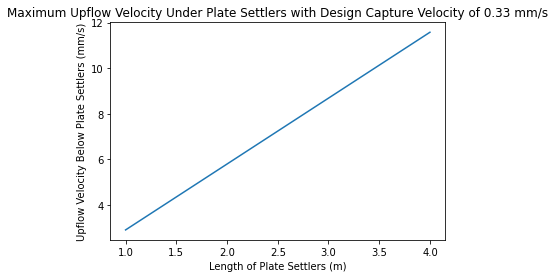

In [5]:
#Plot length of plate settlers versus upflow velocity to get desired capture velocity
#assume same assumptions as above, S = 2 in, angle = 60 deg
#This can be edited with more specific info from vendors

L = np.linspace(1,4,100) * u.m
v_z = (v_capture*(L*np.sin(angle_plate)*np.cos(angle_plate)/d_plate)).to(u.mm/u.s)

plt.plot(L,v_z)
plt.xlabel("Length of Plate Settlers (m)")
plt.ylabel("Upflow Velocity Below Plate Settlers (mm/s)")
plt.title("Maximum Upflow Velocity Under Plate Settlers with Design Capture Velocity of 0.33 mm/s")

Text(0.5, 1.0, 'Plan View Area versus Length of Plate Settlers with Design Capture Velocity of 0.33 mm/s')

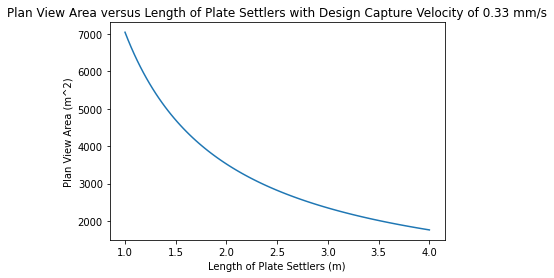

In [6]:
#Calculate Plan View Area Based On Upflow Velocity and Length of Plate Settlers
A_plan = (fmt.q_max / v_z).to(u.m**2)
plt.plot(L,A_plan)
plt.xlabel("Length of Plate Settlers (m)")
plt.ylabel("Plan View Area (m^2)")
plt.title("Plan View Area versus Length of Plate Settlers with Design Capture Velocity of 0.33 mm/s")

The results show that longer plate settlers increase upflow velocity, and thus decrease plan view area and costs significantly.  However, there will also be an economic and design cost with making a deeper tank.  More work is needed on economic analysis to clarify this and find the breakpoint between depth and plan view area.  However, our assumption is that sedimentation tank depth is cheaper to increase than plan view area and thus plate settlers should be as long as possible meeting site and vendor requirements.  We also recommend that all available area in the sedimentation tanks should be filled with plate settlers, only leaving room for flow to enter from the bottom, and sludge to settle.

### Upflow Velocity at Bottom of Sed Tank

The maximum upflow velocity below the plate settlers is also constrained by the sludge falling at the bottom of the plate settlers.  Upflow velocities must be small enough to allow sludge to fall out of the plate settlers and to the bottom to be collected.  Horizontal velocities along the bottom space under the the plate settlers must also be low enough to prevent scouring or resuspension of settled sludge into the water.

One possible approach to solving this issue is having flow enter the plate settlers horizontally before flowing upwards.  One example of this are the [MRI plate settlers](https://www.meurerresearch.com/sites/default/files/documents/2020-03/platesettler_singles1.pdf), which are demonstrated in [video](https://www.youtube.com/watch?v=OxYLOGqr10I).  This design includes two important solutions: it uses the helical flow diffuser the reduce velocity coming into the tank, and has entry ports on the side of the plate settlers horzontally (although we are skeptical that most flow enters through these ports and not the bottom of the sedimentation tank).  

Without using a process like this, there is little guidance on what is the maximum velocity entering the plate settlers.  Table 10.6 in the MWH textbook (MWH, pg. 681) lists the maximum velocity through tube settlers as 2.5 mm/s, which is significantly smaller than even the shortest plate settler design.  Baed on the physics we would expect this value should be close to the capture velocity to allow the flocs to fall, but this would also required areas unfeasibly large.  The team is still working on quantifying this and creating a safe design.  The current plan is to talk with vendors, Tori, and Mickey about this design constraint.  

### Flow Distribution Calcs

For a large plant with many sed tanks each with many plate settlers, we want to ensure even flows through each part of the basin.  The main sources of headloss through the plate settlers are in the influent manifold, where water enters through an orifice, and the exit, where water flows into a manifold or trough to the next channel.  Headloss through the plate settlers is order $\mu$m and thus neglibible.  

Given that water will flow through the path with the lowest headloss, small changes in headloss through the influent or effluent mainfold can create uneven flow patterns.  To prevent this we create an additional source of headloss that is significantly larger than other losses.  Since other losses are orders of magnitude smaller, this headloss will drive the flow and divide the flow evenly at each source.  

This headloss is usually accomplished either by designing the orifices on the effluent mainfold to create additional headloss, or by adding an additional orifice, often within the plate settlers, to create this headloss at the end of the flow path.  

To ensure even flow distribution we use the following equation:
$\frac{\bar v_{P}}{\bar v_{M_1}} = \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}$

Text(0.5, 1.0, 'Design Effluent Velocity for Even Flow with Design Flow Ratio of 0.85')

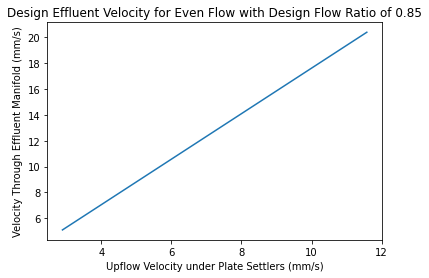

In [7]:
def Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_Flow):
  return np.sqrt((Ratio_Flow**2 + 1)/(2*(1-Ratio_Flow**2)))

design_ratio = Ratio_Pipe_Manifold_V_Port_to_V_Man(0.85)
eff_vel = v_z * design_ratio
plt.plot(v_z,eff_vel)
plt.xlabel("Upflow Velocity under Plate Settlers (mm/s)")
plt.ylabel("Velocity Through Effluent Manifold (mm/s)")
plt.title("Design Effluent Velocity for Even Flow with Design Flow Ratio of 0.85")


This plot shows a comparison of the required velocity through an effluent mainfold at the top of the plate settlers versus the upflow velocity below the plate settlers.  This velocity could be set by an orifice created with the correct dimensions using the following equation:

$ v_{port} = \frac{Q}{n_{ports}*A_{port}} $


A challenge of this approach is that headloss will change if flowrate varies as it is proportional to velocity^2.  One solution for this problem would be to carefully manage flow to each sedimentation tank and shut off unecessary tanks to ensure each runs at close to the maximum velocity always.  Another would be to decrease port velocity further and create more headloss, to ensure there is still optimal headloss at lower flowrates.

### Enclosure of the FWSP

An additional final consideration for our design is the full enclosure of the FWSP. As outlined in the constraints section of this Basis of Design Report, the enclosure of the FWSP will (1) prevent issues with density currents negatively impacting effluent water quality, (2) prevent other particulates from entering the plant and damaging effluent water quality, and (3) improve comfort for the operators and ease of use of the plant itself. For these reasons, we propose that the sedimentation unit process, as well as the entire treatment plant, be fully enclosed.

Monroe's reflections
I'm interested in seeing what you find about maximum velocity beneath the plate settlers and how that influences the dimensions of the sed tanks.
I'd suggest only having one redundant sed tank.
See if 8 sed tanks is viable given that they drew that many in the SOW.